In [40]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca
import pandas as pd
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.decomposition as decomposition

In [45]:
df = pd.read_csv("data/diabets.csv", sep='\t')
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [51]:
X0 = df.values[:,:-1]
# X0 = preprocessing.scale(X0)
print(X0.shape, X0.dtype)

(442, 10) float64


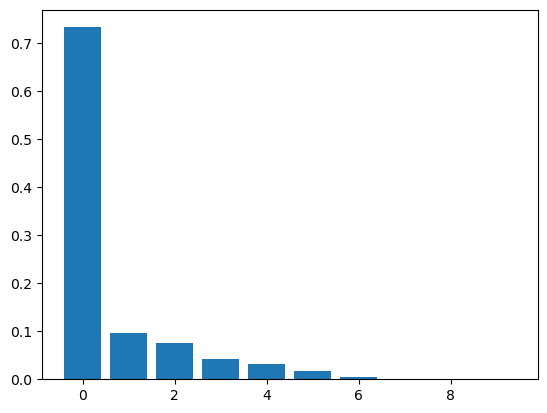

In [52]:
pca_sk = decomposition.PCA()
pca_sk = pca_sk.fit(X0)
U0 = pca_sk.transform(X0)
plt.bar(range(X0.shape[1]), pca_sk.explained_variance_ratio_)
plt.show()

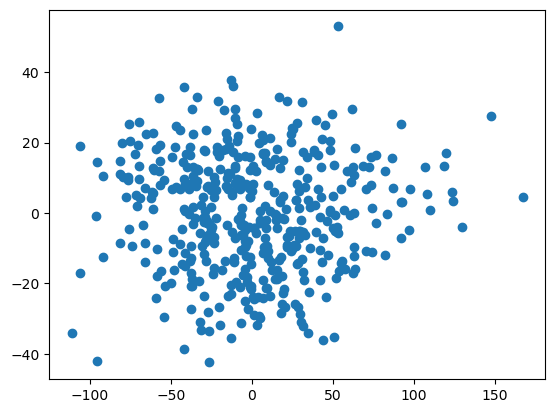

In [53]:
plt.scatter(U0[:,0], U0[:,1])
plt.show()

In [16]:
sk_cs = pca_sk.components_
sk_c0 = pca_sk.mean_
sk_a1 = sk_cs[0,:]
sk_a2 = sk_cs[1,:]

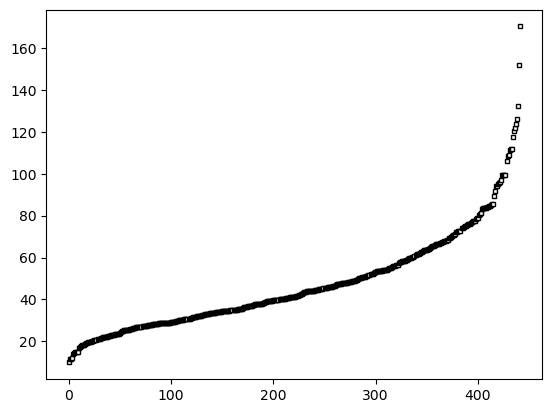

[ 48.51809955   1.46832579  26.37579186  94.64701357 189.14027149
 115.43914027  49.78846154   4.07024887   4.64141086  91.260181  ]


In [17]:
c0 = pca.location(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=3, color='w', markeredgecolor='k')
plt.show()
print(c0)

0.9547511312217195


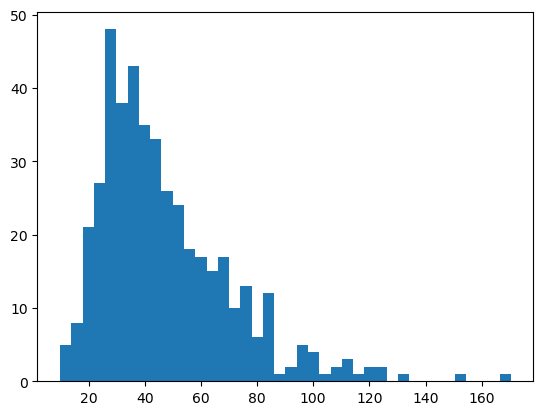

[ 48.51809955   1.46832579  26.37579186  94.64701357 189.14027149
 115.43914027  49.78846154   4.07024887   4.64141086  91.260181  ]


In [28]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.01)))
c = pca.robust_location(X0, wma)
plt.hist(pca.distance_center(X0, c), bins=40)
# plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=3)
plt.show()
print(c)

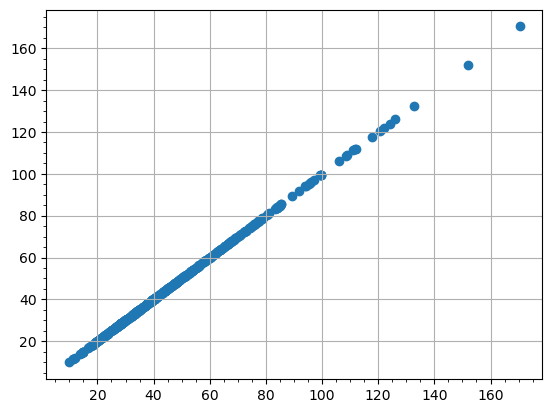

In [29]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [30]:
X1 = X0 - c
X1_0 = X0 - c0

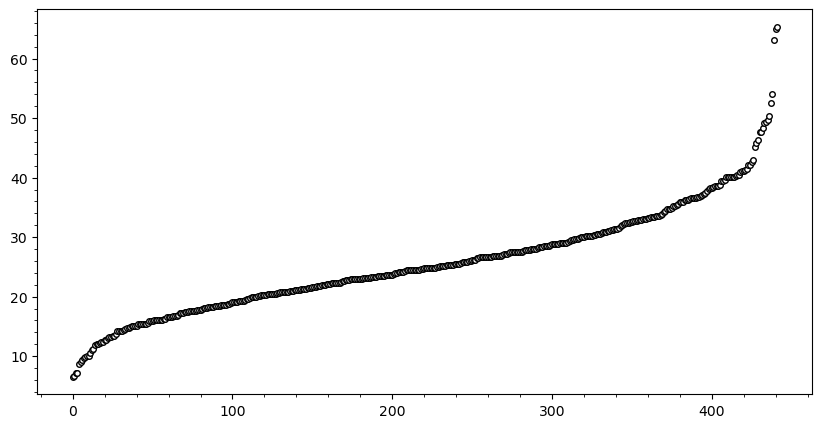

2051.4449870264843 [ 0.08191065  0.00109613  0.02766182  0.08004688  0.74776789  0.64659096
 -0.02160047  0.0177137   0.00533296  0.08984032]


In [31]:
a1_0, L1_0 = pca.find_pc(X1_0)
plt.figure(figsize=(10,5))
# plt.hist(pca.distance_line(X1_0, a1_0), bins=50, rwidth=0.9)
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4, color='w', markeredgecolor='k')
plt.minorticks_on()
plt.show()
print(L1_0, a1_0)

0.9547511312217195


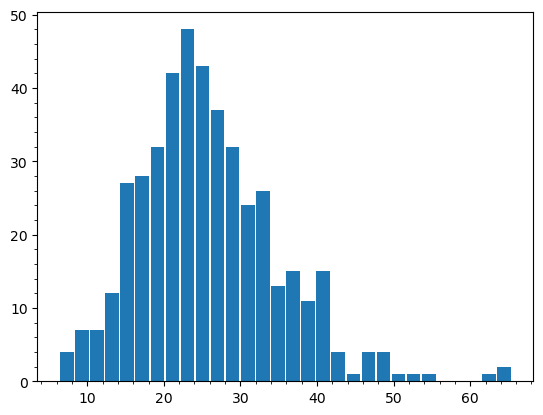

1986.0374256280213 [ 0.07878576  0.00118685  0.03024459  0.08407334  0.74500265  0.64984321
 -0.02817317  0.01815274  0.00541595  0.08561892]


In [32]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.01)))
a1, L1 = pca.find_robust_pc(X1, wma)

plt.hist(pca.distance_line(X1, a1), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4)
plt.minorticks_on()
plt.show()
print(L1, a1)
U1 = pca.project_line(X1, a1)
U1_0 = pca.project_line(X1_0, a1_0)

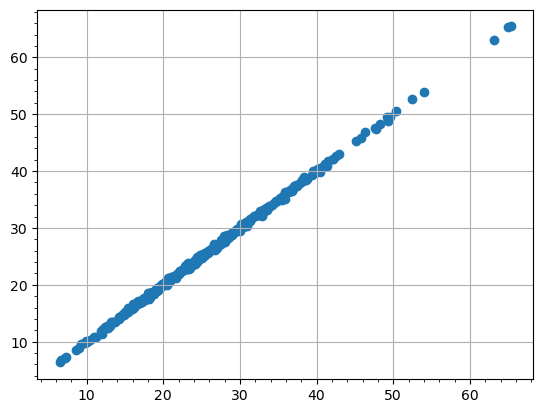

In [33]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [34]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

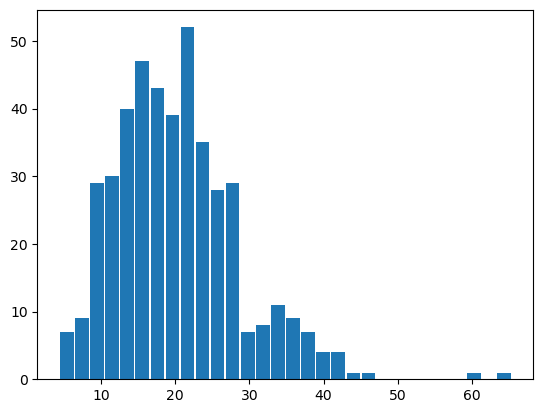

269.47372163738623 [ 0.43258758  0.01127963  0.12190946  0.62126932 -0.1697807  -0.01875963
 -0.46341786  0.03126219  0.01278337  0.40844708]


In [35]:
a2_0, L2_0 = pca.find_pc(X2)
plt.hist(pca.distance_line(X2_0, a2_0), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4)
plt.show()
print(L2_0, a2_0)

0.9773755656108597


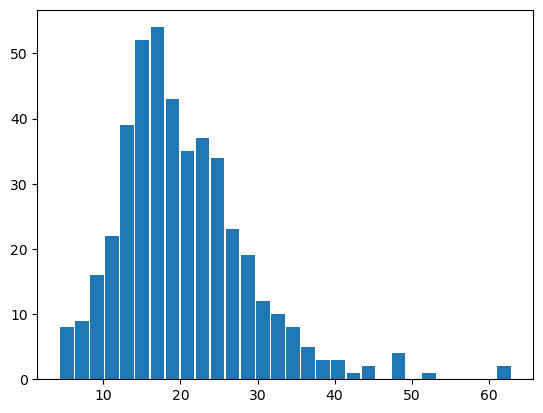

254.24561193623225 [ 0.50608991  0.00876284  0.11157475  0.65325462 -0.04036575 -0.17645801
 -0.25180745  0.01968516  0.01486504  0.45587651]


In [36]:
N = len(X0)
alpha = (N - 10) / N
print(alpha)
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.01)))
a2, L2 = pca.find_robust_pc(X2, wma)
plt.hist(pca.distance_line(X2, a2), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=3)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

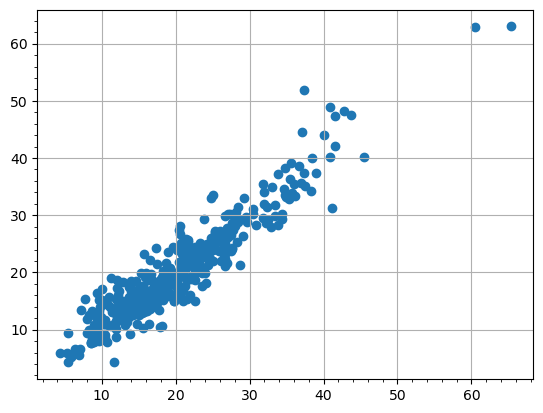

In [37]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

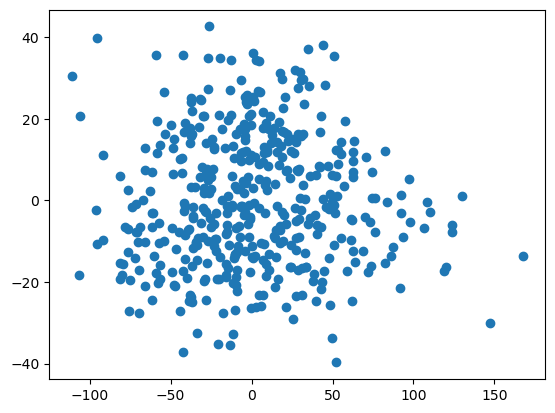

In [38]:
plt.scatter(U1,U2)
plt.show()

In [21]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [22]:
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(0.95, 0.001))
S = pca.robust_scatter_matrix(X1, wma)
print(S)

[[ 0.49458597 -2.38702108]
 [-2.38702108 13.54237703]] 0.5052420657207114
[[ 0.44696265 -2.15670428]
 [-2.15670428 12.64394995]] 0.49805397974489957
K: 99
[[ 0.44696265 -2.15670428]
 [-2.15670428 12.64394995]]


In [23]:
L, A = np.linalg.eig(S)
print(A)
np.dot(A[0], A[1])

[[-0.98559164  0.16914229]
 [-0.16914229 -0.98559164]]


8.326672684688674e-17

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


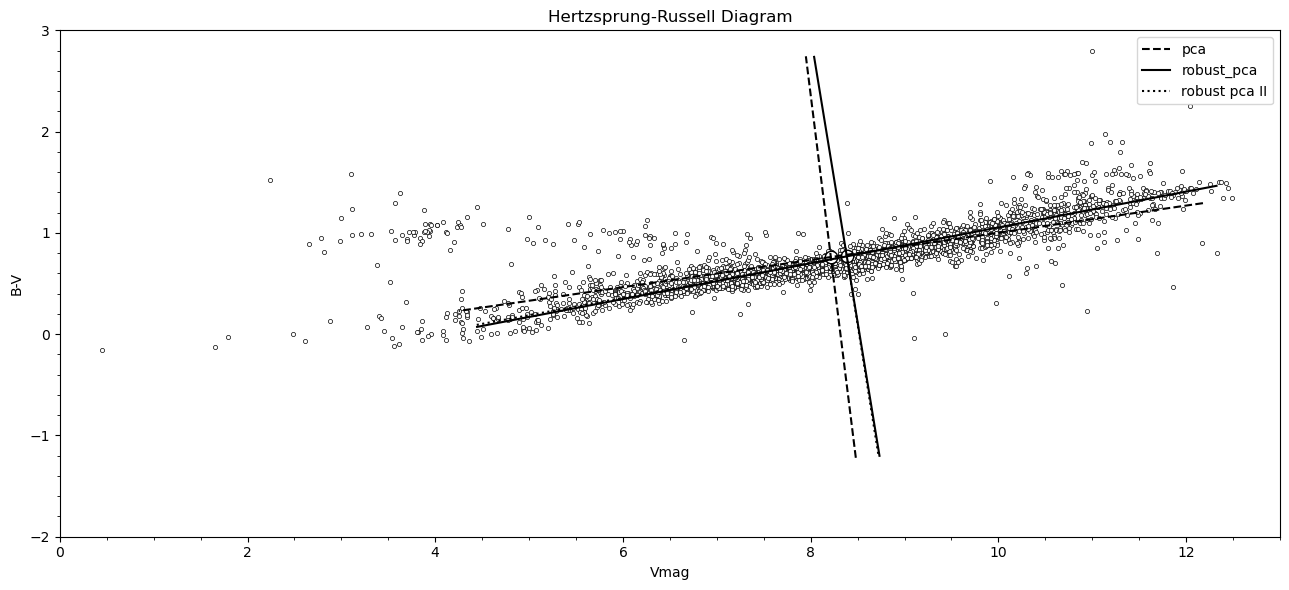

In [24]:
plt.figure(figsize=(13,6))
plt.scatter(Vmag, B_V, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.scatter([sk_c0[0]], [sk_c0[1]], s=81, c='w', edgecolors='k')
plt.scatter([c[0]], c[[1]], s=81, c='w', edgecolors='k')
plt.plot([sk_c0[0]-4*sk_a1[0], sk_c0[0]+4*sk_a1[0]], [sk_c0[1]-4*sk_a1[1], sk_c0[1]+4*sk_a1[1]], 
         label='pca', linestyle='--', c='k')
plt.plot([sk_c0[0]-2*sk_a2[0], sk_c0[0]+2*sk_a2[0]], [sk_c0[1]-2*sk_a2[1], sk_c0[1]+2*sk_a2[1]],
        linestyle='--', c='k')
plt.plot([c[0]-4*a1[0], c[0]+4*a1[0]], [c[1]-4*a1[1], c[1]+4*a1[1]], 
         label='robust_pca', linestyle='-', c='k')
plt.plot([c[0]-2*a2[0], c[0]+2*a2[0]], [c[1]-2*a2[1], c[1]+2*a2[1]],
        linestyle='-', c='k')
plt.plot([c[0]+4*A[0,0], c[0], c[0]+2*A[0,1]], [c[1]+4*A[1,0], c[1], c[1]+2*A[1,1]], 
         c='k', linestyle=':', label='robust pca II')
plt.legend()
plt.xlabel('Vmag')
plt.ylabel('B-V')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.xlim(0,13)
plt.ylim(-2,3)
plt.tight_layout()
plt.savefig('fig/robust_pca_HIP_star_1.eps')
plt.show()